In [169]:
import pandas as pd # Para el manejo de los datos
import numpy as np # Para manejo de vectores y matrices
import matplotlib.pyplot as plt # Para los gráficos
import seaborn as sns # Para graficar el mapa de calor

from sklearn.feature_extraction.text import CountVectorizer # Para convertir texto a vectores de frecuencia de palabra
from sklearn.feature_extraction.text import TfidfVectorizer # Para convertir texto a vectores de recuento de palabras
from sklearn.feature_extraction.text import HashingVectorizer # Para convertir texto a enteros únicos

from sklearn.model_selection import train_test_split # Para dividir el DataSet

from sklearn.svm import SVC # Para el algoritmo Support Vector Machine

from yellowbrick.classifier import ClassificationReport # Para graficar el reporte de clasificación
from sklearn.metrics import classification_report # Para mostrar el reporte de clasificación
from sklearn.metrics import confusion_matrix # Para obtener la matriz de confución

from collections import Counter # para contar objetos
from imblearn.under_sampling import NearMiss # Para el submuestreo aleatorio
from imblearn.over_sampling import RandomOverSampler #Para el sobremuestreo aleatorio
from imblearn.combine import SMOTETomek # Para técnica de combinar el remuestreo
from imblearn.ensemble import BalancedBaggingClassifier #Para clasificador de ensamble

## Se cargan los datos procesados

In [170]:
df = pd.read_csv("Data_procesada/datos_procesados.csv", sep=";", encoding='utf-8')

## Función para convertir texto a vectores de frecuencia de palabra

In [171]:
def transformarTFIDF(df):
    vectorizer_TFIDF = TfidfVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        analyzer='word', 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        max_df=0.8, 
        min_df=7, 
        max_features=50, 
        vocabulary=None, 
        binary=False, 
        dtype=np.float64, 
        norm='l2', 
        use_idf=True, 
        smooth_idf=True, 
        sublinear_tf=False
    )
    vector = vectorizer_TFIDF.fit_transform(df['MENSAJES']).toarray()
    return vector

## Función para convertir texto a vectores de recuento de palabras

In [172]:
def transformarCountVectorizer(df):
    vectorizer_count_vectorizer = CountVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        analyzer='word', 
        max_df=1.0, 
        min_df=1, 
        max_features=None, 
        vocabulary=None, 
        binary=False, 
        dtype=np.int64
    )
    vector = vectorizer_count_vectorizer.fit_transform(df['MENSAJES']).toarray()
    return vector

## Función para convertir texto a enteros únicos

In [173]:
def transformarHashingVectorizer(df):
    vectorizer_hashing_vectorizer = HashingVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        analyzer='word', 
        n_features=100, 
        binary=False, 
        norm='l2', 
        alternate_sign=True, 
        dtype=np.float64
    )
    vector = vectorizer_hashing_vectorizer.fit_transform(df['MENSAJES']).toarray()
    return vector

In [174]:
vector_ = transformarTFIDF(df)
#vector_ = transformarCountVectorizer(df)
#vector_ = transformarHashingVectorizer(df)

## Dividir DATSET:
### DATOS DE ENTRENAMIENTO = 80%
### DATOS DE TEST = 20%

In [175]:
def dividirDataSet(vector, labels):
    X_train, X_test, y_train, y_test = train_test_split(
        vector, 
        labels, 
        test_size=0.2,
        train_size=None, 
        random_state=0,
        shuffle=True,
        stratify=None,
    )
    return X_train, X_test, y_train, y_test

In [176]:
labels = df['POLARIDAD'].iloc[:].values
X_train, X_test, y_train, y_test = dividirDataSet(vector_, labels)

## Función para crear el modelo con el algoritmo Support Vectore Machine

In [177]:
def SupportVectorMachine():
    classifier = SVC(
        C=2.0, 
        kernel='rbf', 
        degree=8, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True,
        probability=True, 
        tol=0.001, 
        cache_size=200,
        #class_weight=None, 
        class_weight='balanced',
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovo', 
        break_ties=False, 
        random_state=10
    )
    return classifier

## Función para entrenar el modelo

In [178]:
def entrenarModelo(classifier, X_train, y_train):
    return classifier.fit(X_train, y_train)

## Función para testear el modeo

In [179]:
def probarModelo(classifier, X_test):
    return classifier.predict(X_test)

## Función para graficar graficar la matriz de confución

In [180]:
def graficarMatrizConfucion(y_test, predictions):
    conf_matrix = confusion_matrix(y_test, predictions, labels=np.unique(predictions))
    plt.figure(figsize=(9.1, 9.1))
    sns.heatmap(
        conf_matrix,
        xticklabels=['Negativo', 'Neutro', 'Positivo'], 
        yticklabels=['Negativo', 'Neutro', 'Positivo'],
        annot=True, 
        fmt="d")
    plt.title("Matriz de confusión")
    plt.ylabel('Clases verdaderas')
    plt.xlabel('Predicciones')
    plt.show()

## Función para graficar los resultados

In [181]:
def graficarReporte(X_train, y_train, classifier):
    visualizer = ClassificationReport(classifier, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Función para imprimir los resultados

In [182]:
def imprimirResultados(y_test, predictions):
    print(classification_report(y_test, predictions))

In [183]:
classifier = SupportVectorMachine()
classifier_fit = entrenarModelo(classifier, X_train, y_train)
predictions = probarModelo(classifier_fit, X_test)

In [184]:
(i, j, k) = 0, 0, 0
for x in y_test:
    if x == 'negativo':
        i += 1
    if x == 'neutro':
        j += 1
    if x == 'positivo':
        k += 1
print('Total negativos - Clase 0: ',i)
print('Total neutro   -  Clase 1: ', j)
print('Total positivo -  Clase 2: ', k)
print('total: ',i+j+k)

Total negativos - Clase 0:  30
Total neutro   -  Clase 1:  9
Total positivo -  Clase 2:  310
total:  349


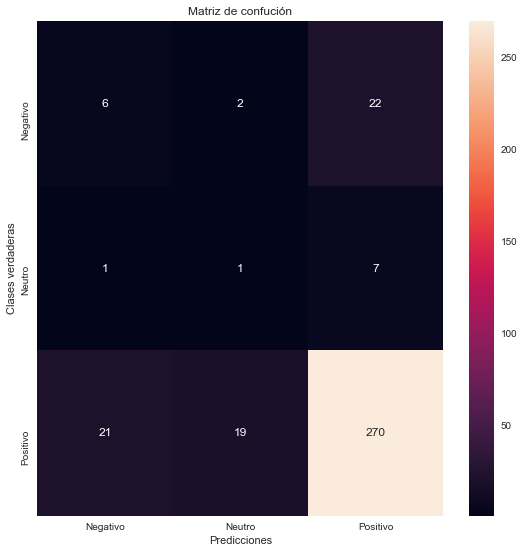

In [185]:
graficarMatrizConfucion(y_test, predictions)

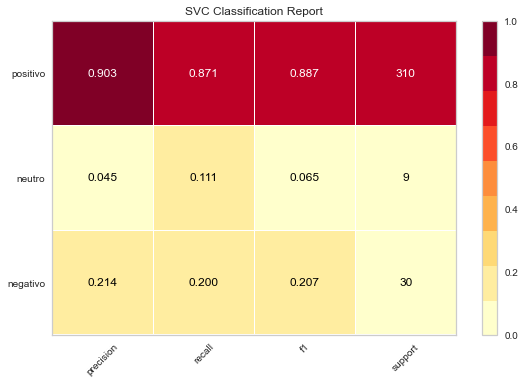

In [186]:
graficarReporte(X_train, y_train, classifier_fit)

In [187]:
imprimirResultados(y_test, predictions)

              precision    recall  f1-score   support

    negativo       0.21      0.20      0.21        30
      neutro       0.05      0.11      0.06         9
    positivo       0.90      0.87      0.89       310

    accuracy                           0.79       349
   macro avg       0.39      0.39      0.39       349
weighted avg       0.82      0.79      0.81       349



## Estrategias para resolver desequilibrio de datos

## Penalización para compensar
### class_weight="balanced", con este hiper-parámetro el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento.

## Estrategia: Submuestreo aleatorio

In [188]:
def Submuestreo(valor, etiqueta, modelo):
    us = NearMiss()
    X, y = us.fit_resample(valor, etiqueta)

    print("Distribución antes de resampling {}".format(Counter(labels)))
    print("Distribución despues de resampling {}".format(Counter(y)))
    print('')

    X_train_res, X_test_res, y_train_res, y_test_res = dividirDataSet(X, y)
    
    classifier_fit_resampling = entrenarModelo(modelo, X_train_res, y_train_res)
    predictions_resampling = probarModelo(classifier_fit_resampling, X_test_res)

    graficarMatrizConfucion(y_test_res, predictions_resampling)
    print(classification_report(y_test_res, predictions_resampling))

Distribución antes de resampling Counter({'positivo': 1563, 'negativo': 134, 'neutro': 47})
Distribución despues de resampling Counter({'negativo': 47, 'neutro': 47, 'positivo': 47})



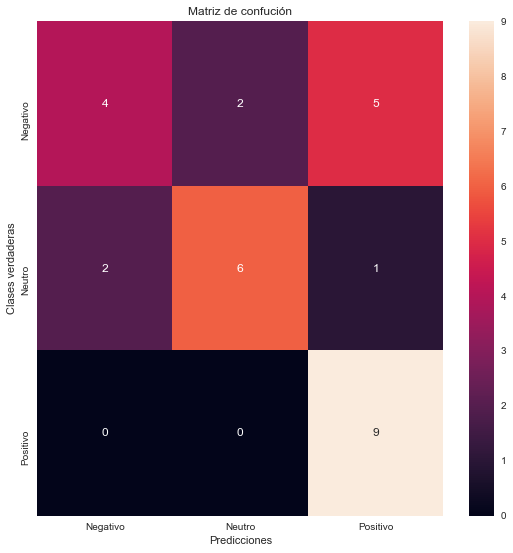

              precision    recall  f1-score   support

    negativo       0.67      0.36      0.47        11
      neutro       0.75      0.67      0.71         9
    positivo       0.60      1.00      0.75         9

    accuracy                           0.66        29
   macro avg       0.67      0.68      0.64        29
weighted avg       0.67      0.66      0.63        29



In [189]:
Submuestreo(vector_, labels, classifier)

## Estrategia: Sobremuestreo aleatorio

In [190]:
def Sobremuestreo(valor, etiqueta, modelo):
    os = RandomOverSampler()
    #X_train_res_over, y_train_res_over = os.fit_resample(X_train, y_train)
    X, y = os.fit_resample(valor, etiqueta)

    print("Distribution before resampling {}".format(Counter(etiqueta)))
    print("Distribution labels after resampling {}".format(Counter(y)))
    print('')

    X_train_res, X_test_res, y_train_res, y_test_res = dividirDataSet(X, y)
    
    classifier_fit_oversampling = entrenarModelo(modelo, X_train_res, y_train_res)
    predictions_oversampling = probarModelo(classifier_fit_oversampling, X_test_res)

    graficarMatrizConfucion(y_test_res, predictions_oversampling)
    print(classification_report(y_test_res, predictions_oversampling))

Distribution before resampling Counter({'positivo': 1563, 'negativo': 134, 'neutro': 47})
Distribution labels after resampling Counter({'neutro': 1563, 'positivo': 1563, 'negativo': 1563})



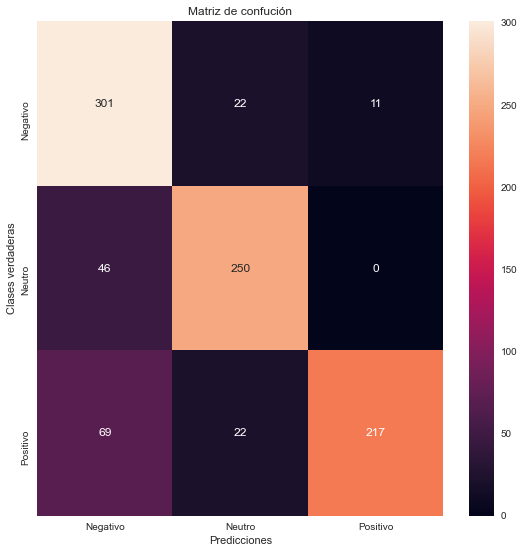

              precision    recall  f1-score   support

    negativo       0.72      0.90      0.80       334
      neutro       0.85      0.84      0.85       296
    positivo       0.95      0.70      0.81       308

    accuracy                           0.82       938
   macro avg       0.84      0.82      0.82       938
weighted avg       0.84      0.82      0.82       938



In [191]:
Sobremuestreo(vector_, labels, classifier)

## Estrategia: Combinar el remuestreo con Smote-Tomek

In [192]:
def CombinarRemuestreo(valor, etiqueta, modelo):
    os_us = SMOTETomek()
    X, y = os_us.fit_resample(valor, etiqueta)

    print("Distribution before resampling {}".format(Counter(labels)))
    print("Distribution after resampling {}".format(Counter(y)))
    print('')

    X_train_res, X_test_res, y_train_res, y_test_res = dividirDataSet(X, y)

    classifier_fit_somte = entrenarModelo(modelo, X_train_res, y_train_res)
    predictions_smote = probarModelo(classifier_fit_somte, X_test_res)

    graficarMatrizConfucion(y_test_res, predictions_smote)

    print(classification_report(y_test_res, predictions_smote))

Distribution before resampling Counter({'positivo': 1563, 'negativo': 134, 'neutro': 47})
Distribution after resampling Counter({'positivo': 1561, 'neutro': 1547, 'negativo': 1545})



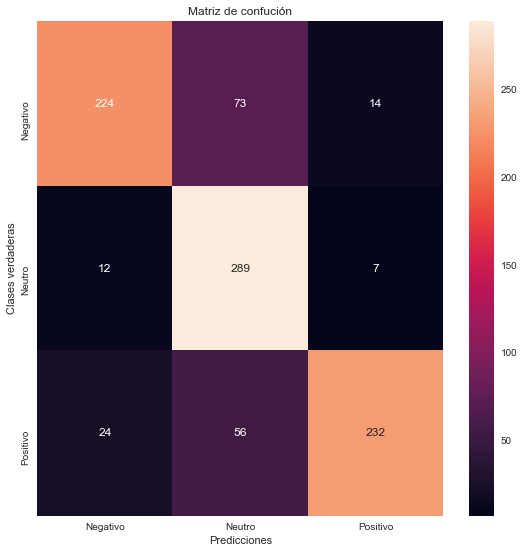

              precision    recall  f1-score   support

    negativo       0.86      0.72      0.78       311
      neutro       0.69      0.94      0.80       308
    positivo       0.92      0.74      0.82       312

    accuracy                           0.80       931
   macro avg       0.82      0.80      0.80       931
weighted avg       0.82      0.80      0.80       931



In [193]:
CombinarRemuestreo(vector_, labels, classifier)

## Estrategia: Ensamble de Modelos con Balanceo

In [194]:
def Ensamble(X_train, X_test, y_train, y_test):
    bbc = BalancedBaggingClassifier(
        base_estimator=SVC(),
        sampling_strategy='auto',
        replacement=True,
        random_state=0
        )

    bbc.fit(X_train, y_train)
    pred_y = bbc.predict(X_test)

    graficarMatrizConfucion(y_test, pred_y)
    print(classification_report(y_test, pred_y))

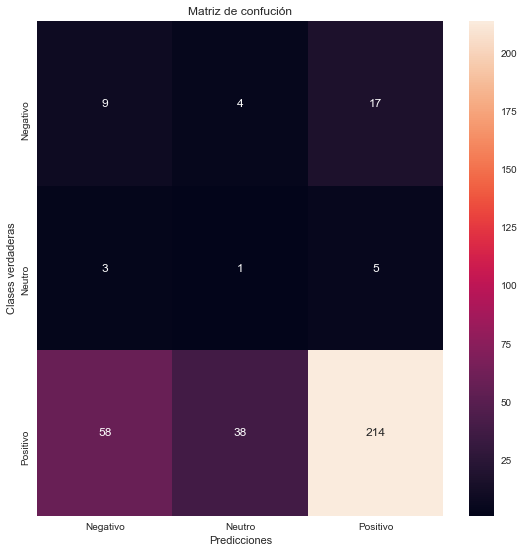

              precision    recall  f1-score   support

    negativo       0.13      0.30      0.18        30
      neutro       0.02      0.11      0.04         9
    positivo       0.91      0.69      0.78       310

    accuracy                           0.64       349
   macro avg       0.35      0.37      0.33       349
weighted avg       0.82      0.64      0.71       349



In [195]:
Ensamble(X_train, X_test, y_train, y_test)

In [196]:
from sklearn.model_selection import GridSearchCV
classifier = SVC()
params = {
    'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }

grid = GridSearchCV(classifier, params, cv=10)
grid.fit(X_train, y_train)
grid.best_estimator_.get_params()

{'C': 2.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 10,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}